<h2>Project 1: $k$-Nearest Neighbors</h2>
<p><cite><center>So many points,<br>
some near some far,<br>
- who are my true neighbors?</center></cite></p>

<h3>Introduction</h3>

<p>In this project, you will build a $k$-nearest neighbor classifier.</p>

<strong>How to submit:</strong> You can submit your code using the red <strong>Submit</strong> button above. This button will send any code below surrounded by <strong>#&lt;GRADED&gt;</strong><strong>#&lt;/GRADED&gt;</strong> tags below to the autograder, which will then run several tests over your code. By clicking on the <strong>Details</strong> dropdown next to the Submit button, you will be able to view your submission report once the autograder has completed running. This submission report contains a summary of the tests you have failed or passed, as well as a log of any errors generated by your code when we ran it.

Note that this may take a while depending on how long your code takes to run! Once your code is submitted you may navigate away from the page as you desire -- the most recent submission report will always be available from the Details menu.

<p><strong>Evaluation:</strong> Your code will be autograded for technical
correctness and--on some assignments--speed. Please <em>do not</em> change the names of any provided functions or classes within the code, or you will wreak havoc on the autograder. Furthermore, <em>any code not surrounded by <strong>#&lt;GRADED&gt;</strong><strong>#&lt;/GRADED&gt;</strong> tags will not be run by the autograder</em>. However, the correctness of your implementation -- not the autograder's output -- will be the final judge of your score.  If necessary, we will review and grade assignments individually to ensure that you receive due credit for your work.

<p><strong>Academic Integrity:</strong> We will be checking your code against other submissions in the class for logical redundancy. If you copy someone else's code and submit it with minor changes, we will know. These cheat detectors are quite hard to fool, so please don't try. We trust you all to submit your own work only; <em>please</em> don't let us down. If you do, we will pursue the strongest consequences available to us.

<p><strong>Getting Help:</strong> You are not alone!  If you find yourself stuck  on something, contact the course staff for help.  Office hours, section, and the <a href="https://piazza.com/class/icxgflcnpra3ko">Piazza</a> are there for your support; please use them.  If you can't make our office hours, let us know and we will schedule more.  We want these projects to be rewarding and instructional, not frustrating and demoralizing.  But, we don't know when or how to help unless you ask.  



**Libraries**: Before we get started we need to install a few libraries. You can do this by executing the following code.

In [1]:
#<GRADED>
import numpy as np
from scipy.stats import mode

#</GRADED>
import sys
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time


%matplotlib inline

In [2]:
print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.5.2


In [3]:
np.__version__

'1.14.0'

<h3> k-Nearest Neighbors implementation in Python </h3>

<p>Our first goal towards a $k$NN classifier is to build a classifier for handwritten digits classification and face recognition. 
</p>

**Data:** We first obtain some data for testing your code. The data resides in the files <code>faces.mat</code> and <code>digits.mat</code> which hold the datasets for the further experiments. First, let us define a function that loads the data set.

In [4]:
def loaddata(filename):
    """
    Returns xTr,yTr,xTe,yTe
    xTr, xTe are in the form nxd
    yTr, yTe are in the form nx1
    """
    data = loadmat(filename)
    xTr = data["xTr"]; # load in Training data
    yTr = np.round(data["yTr"]); # load in Training labels
    xTe = data["xTe"]; # load in Testing data
    yTe = np.round(data["yTe"]); # load in Testing labels
    return xTr.T,yTr.T,xTe.T,yTe.T

Here, <b>xTr</b> are the training vectors with labels <b>yTr</b> and <b>xTe</b> are the testing vectors with labels <b>yTe</b>. 
As a reminder, to predict the label or class of an image in <b>xTe</b>, we will look for the <i>k</i>-nearest neighbors in <b>xTr</b> and predict a label based on their labels in <b>yTr</b>. For evaluation, we will compare these labels against the true labels provided in <b>yTe</b>.</p>

<h4> Visualizing data</h4>

Let us take a look at our data. The following script will take the first 10 training images from the face data set and visualize them.

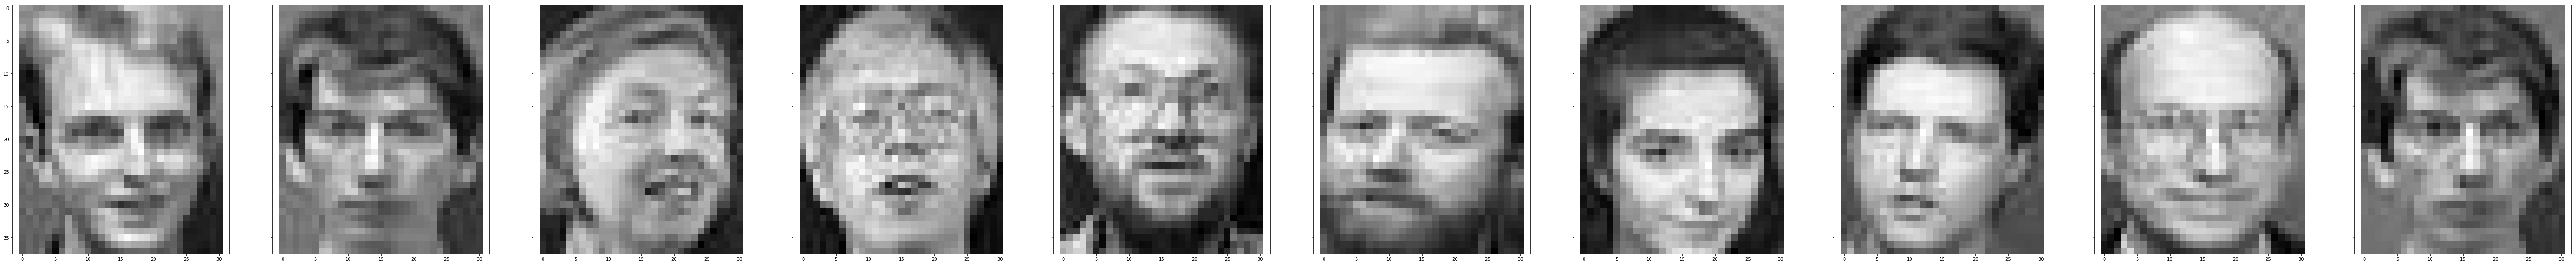

In [5]:
xTr,yTr,xTe,yTe=loaddata("faces.mat")

def plotfaces(X, xdim=38, ydim=31, ):
    n, d = X.shape
    f, axarr = plt.subplots(1, n, sharey=True)
    f.set_figwidth(10 * n)
    f.set_figheight(n)
    
    if n > 1:
        for i in range(n):
            axarr[i].imshow(X[i, :].reshape(ydim, xdim).T, cmap=plt.cm.binary_r)
    else:
        axarr.imshow(X[0, :].reshape(ydim, xdim).T, cmap=plt.cm.binary_r)
plotfaces(xTr[:10, :])

In [6]:
#workarea... Not for submission

print(xTr.shape)
print(yTr.shape)
print()
print(xTe.shape)
print(yTe.shape)
print()
print(type(xTr))

print(xTr[1, :])
#pixels read column wise while forming .mat file


np.array(xTe[1,:], ndmin=2)

(280, 1178)
(280, 1)

(120, 1178)
(120, 1)

<class 'numpy.ndarray'>
[101.  96. 100. ...  54.  54.  53.]


array([[109., 116., 114., ...,  60.,  61.,  53.]])

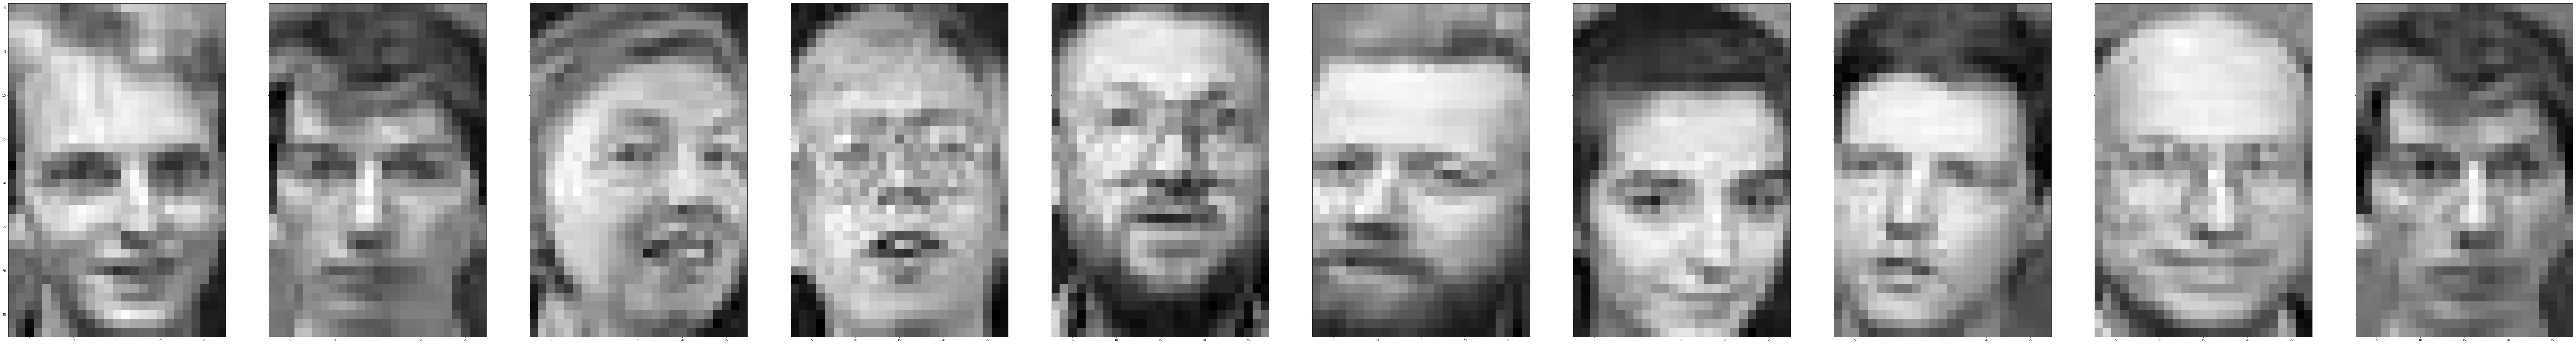

In [49]:
#workarea  ... Not for submission

def plotfaces1(X, xdim=38, ydim=31, ):
    n, d = X.shape
    f, axarr = plt.subplots(1, n, sharey=True)
    f.set_figwidth( 15*n)
    f.set_figheight(2*n)
    
    if n > 1:
        for i in range(n):
            axarr[i].imshow(X[i, :].reshape(ydim, xdim).T, cmap=plt.cm.binary_r)
    else:
        axarr.imshow(X[0, :].reshape(ydim, xdim).T, cmap=plt.cm.binary_r)
plotfaces1(xTr[:10, :])


<h4> Implementation </h4>
<p> The following questions will ask you to finish these functions in a pre-defined order. <br></p>

<p>(a) Implement the functions <b><code>innerproduct</code></b> and <b><code>l2distance</code></b>. You may use your own code(s) from the previous project.</p>

<p>(b) Implement the function <b><code>findknn</code></b>, which should find the $k$ nearest neighbors of a set of vectors within a given training data set. The call of 
<pre>
 [I,D]=findknn(xTr,xTe,k);
</pre> 
should result in two matrices $I$ and $D$, both of dimensions $k\times n$, where $n$ is the number of input vectors in <code>xTe</code>. The matrix $I(i,j)$ is the index of the $i^{th}$ nearest neighbor of the vector $xTe(j,:)$. 
So, for example, if we set <code>i=I(1,3)</code>, then <code>xTr(i,:)</code> is the first nearest neighbor of vector <code>xTe(3,:)</code>. The second matrix $D$ returns the corresponding distances. So $D(i,j)$ is the distance of $xTe(j,:)$ to its $i^{th}$ nearest neighbor.
</p>

In [6]:
#<GRADED>
def innerproduct(X,Z=None):
    # function innerproduct(X,Z)
    #
    # Computes the inner-product matrix.
    # Syntax:
    # D=innerproduct(X,Z)
    # Input:
    # X: nxd data matrix with n vectors (rows) of dimensionality d
    # Z: mxd data matrix with m vectors (rows) of dimensionality d
    #
    # Output:
    # Matrix G of size nxm
    # G[i,j] is the inner-product between vectors X[i,:] and Z[j,:]
    #
    # call with only one input:
    # innerproduct(X)=innerproduct(X,X)
    #
    if Z is None: # case when there is only one input (X)
        G=np.matmul(X,X.transpose())
    else:  # case when there are two inputs (X,Z)
        G=np.matmul(X,Z.transpose())
    
    return G

def l2distance(X,Z=None):
    # function D=l2distance(X,Z)
    #
    # Computes the Euclidean distance matrix.
    # Syntax:
    # D=l2distance(X,Z)
    # Input:
    # X: nxd data matrix with n vectors (rows) of dimensionality d
    # Z: mxd data matrix with m vectors (rows) of dimensionality d
    #
    # Output:
    # Matrix D of size nxm
    # D(i,j) is the Euclidean distance of X(i,:) and Z(j,:)
    #
    # call with only one input:
    # l2distance(X)=l2distance(X,X)
    #

    if Z is None:
        m=n=X.shape[0]
        d=X.shape[1]
        
        S=np.tile(np.einsum('ij,ij->i',X,X),m).reshape((m,n)).T
        R=np.tile(np.einsum('ij,ij->j',X.T,X.T),n).reshape(n,m)
        G=2*innerproduct(X,X)
        D=S+R-G
    else:  # case when there are two inputs (X,Z)
        n=X.shape[0]
        d=X.shape[1]
        m=Z.shape[0]
        
        S=np.tile(np.einsum('ij,ij->i',X,X),m).reshape((m,n)).T
        R=np.tile(np.einsum('ij,ij->j',Z.T,Z.T),n).reshape(n,m)
        G=2*innerproduct(X,Z)
        D=S+R-G
                 
        
        
    return np.sqrt(np.absolute(D))
#</GRADED>

In [64]:
#workarea

A=[[1,2,3],[4,5,6]]
B=[[1,2,3],[4,5,6]]
# print(np.einsum('ij,ij',A,B))
# print(np.einsum('ij->i',A,B))



# print(np.einsum('ij,ij->ij',A,B))
# print(np.einsum('ij,ij->i',A,B))
# print(np.einsum('ij,ij->j',A,B))

# S=np.tile(np.einsum('ij,ij->i',A,B),3).reshape((3,2
#                      )).T
# print(S)

# P=np.matrix([[11,12,13],[14,15,16]])

# print()
# print(P)
# print(np.einsum('ij,ij->ij',P,P))


# print(np.einsum('ij,ij->i',P,P))
# print(np.einsum('ij,ij->j',P,P))

# print()
# print(P.T)
# R=np.tile(np.einsum('ij,ij->j',P.T,P.T),3).reshape(3,2)
# R2=np.tile(np.einsum('ij,ij->i',P,P),3).reshape(3,2)

# # R=np.tile(np.einsum('ij,ij->j',P,P),3).reshape((3,2))

# print(R)
# print(R2)

# x = -np.matrix(np.arange(12).reshape((3,4))); 
x=np.matrix(([4,2,7],[3,8,7],[1,5,3]))
x
print(x)
# print(np.sort(x,axis=0))
# print(np.sort(x,axis=0)[:2,:])

print()

print(np.argsort(x,axis=0))
# print(np.argsort(x,axis=0))

# print()
# q=np.argsort(x,axis=0)

# i=np.where(q<2)
# print(i)
# j=np.matrix(i)
# # print(np.matrix(i))
# # print(np.argsort(np.matrix(i).T,axis=1))
# print(j)
# print(np.argsort(j[1,:]))
# print(j[:,np.argsort(j[1,:])])
# z=j[:,np.argsort(j[1,:])]
# indices=z[0].reshape(-1,2).T
# # print(x)
# # print(x.argsort())
# print(indices)
# print(np.take(x,indices))
# print(x.argsort(0))
# print(np.sort(x.argsort(0),axis=0))


[[4 2 7]
 [3 8 7]
 [1 5 3]]

[[2 0 2]
 [1 2 0]
 [0 1 1]]


In [67]:
x=np.random.randint(0,10,(5,7))
print(x)
print(np.argsort(x,axis=0)[:3,:])

[[4 0 0 9 0 7 6]
 [4 7 0 9 3 7 3]
 [0 2 4 8 1 2 5]
 [6 0 1 3 8 8 3]
 [5 9 8 8 9 6 4]]
[[2 0 0 3 0 2 1]
 [0 3 1 2 2 4 3]
 [1 2 3 4 1 0 4]]


In [7]:
#<GRADED>
def findknn(xTr,xTe,k):
    """
    function [indices,dists]=findknn(xTr,xTe,k);
    
    Finds the k nearest neighbors of xTe in xTr.
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    indices = kxm matrix, where indices(i,j) is the i^th nearest neighbor of xTe(j,:)
    dists = Euclidean distances to the respective nearest neighbors
    """
    
    #Distance matrix - n x m - gives Euclidean distance between vectors(one vector is one image)
    D=l2distance(xTr,xTe)
    
    #Select k smallest distances from D (D has pairwise distances between training and test)
    dists=np.sort(D,axis=0)[:k,:]
    indices=np.argsort(D,axis=0)[:k,:]
    
    
    #raise NotImplementedError('Your code goes here!')
    
    return indices, dists
#</GRADED>

We can visualize the 10 nearest training neighbors of some of the test points.

In [8]:
who = 4
k = 10
indices, dists = findknn(xTr,np.array(xTe[who,:], ndmin=2), k)

In [130]:
#workarea
D=l2distance(xTr,np.array(xTe[:3,:], ndmin=2))
indices, dists = findknn(xTr,np.array(xTe[:3,:], ndmin=2), k)
print("printing 20 rows of distance below")
print(D[:20,:])
print(dists)
print(indices)

printing 20 rows of distance below
[[1376.65318799 1529.47736172 1962.6808197 ]
 [1468.49174325 1834.38899909 2247.96263314]
 [1620.88062485 1534.09158788 1980.27321347]
 [1583.21950468 1531.2527551  1820.12197393]
 [1967.42013815 2095.91674453 1069.20250654]
 [1493.51263804 1366.21703986 1785.43832153]
 [2003.74923581 1864.43503507 2734.0634594 ]
 [1384.38036681 1284.16354099 2273.43286683]
 [1583.21129354 1429.64506085 1866.15701376]
 [1500.99600266 1898.15173261 2285.05032767]
 [1479.22783911 1526.23261661 1706.46740373]
 [1634.00183598 1446.68344844 1936.74262616]
 [1595.84241077 1623.81587626 1707.20151125]
 [1760.9369665  1833.59428446 2791.50873185]
 [1896.74405232 1846.97617743 1725.32083973]
 [1401.87196277 1471.96874967 1828.25244428]
 [1377.5761322  1862.0351769  2130.22768736]
 [1433.92747376 1234.34233501 2158.72832936]
 [1412.3133505  1815.43273078 2154.59717813]
 [1791.33162759 1770.63096099 1655.11661221]]
[[ 575.1678016   848.04598932  694.35797684]
 [ 575.24429593 100

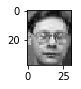

In [9]:
plotfaces(xTe[who,:].reshape(1,-1))

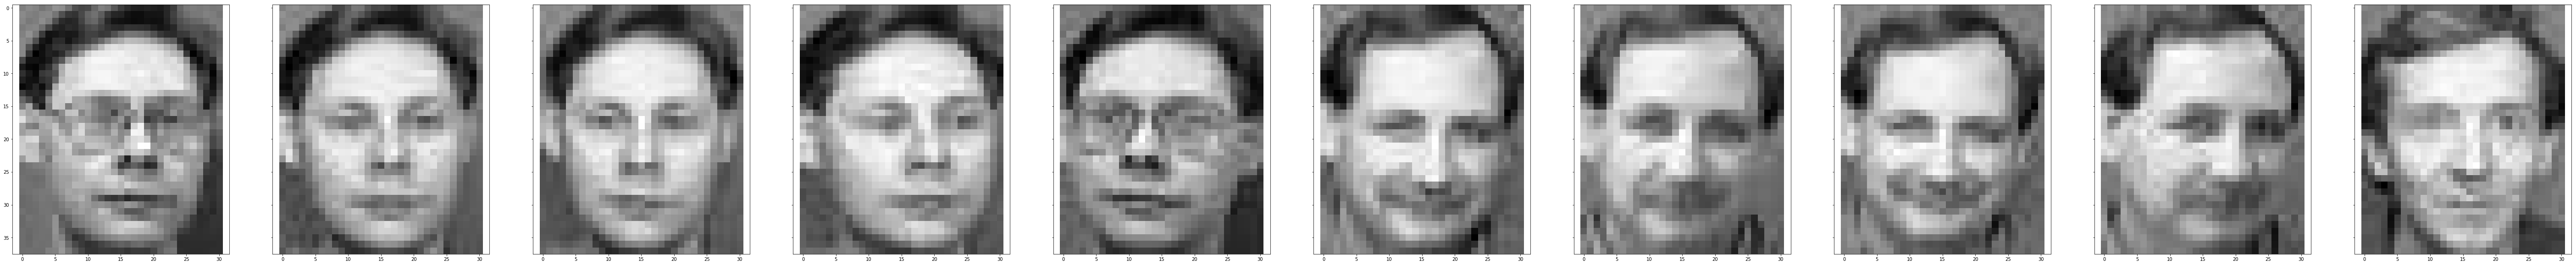

In [10]:
plotfaces(xTr[indices[:,0], :])

In [149]:
#workarea

print(xTr[indices[:,0], :])
print("Prediction values below")
print(yTr[indices])
print("Classifying as")
print(mode(yTr[indices]))
print(mode(yTr[indices])[0].flatten())
#above statement is yTe
print("Actual Test label")
print(yTe[:3,:])

[[119. 122. 114. ...  85.  80.  71.]
 [123. 116. 121. ...  87.  83.  77.]
 [121. 125. 123. ...  78.  77.  76.]
 ...
 [119. 122. 128. ...  98. 101. 102.]
 [106. 107. 106. ... 152. 156. 157.]
 [ 84.  92.  98. ...  38.  51. 130.]]
Prediction values below
[[[15]
  [ 3]
  [14]]

 [[15]
  [ 3]
  [14]]

 [[15]
  [ 3]
  [14]]

 [[30]
  [ 9]
  [14]]

 [[ 5]
  [25]
  [14]]

 [[30]
  [26]
  [37]]

 [[40]
  [25]
  [37]]

 [[25]
  [23]
  [19]]

 [[21]
  [12]
  [14]]

 [[35]
  [38]
  [37]]]
Classifying as
ModeResult(mode=array([[[15],
        [ 3],
        [14]]], dtype=uint8), count=array([[[3],
        [3],
        [6]]]))
[15  3 14]
Actual Test label
[[15]
 [ 3]
 [14]]


In [21]:
list1=[1,1,2,2,3,3]
#list=np.array(list)

# print(list1.count(list1, key=list1.count))
print(mode(list1))

d={2:[2],1:[1]}
d.keys()
d
d.get(2).append(3)
d
list1.count(1)

max_count=mode(list1)[1].flatten()
max_count[0]
d={}
# for key in set(list1):
#     print("key %", key)
#     print("list1.count(key) %",list1.count(key))
#     if(list1.get(list1.count(key)) is :
#        then list1[list1.count(key)]=[];
#     d[list1.count(key)].append(key)
    
# d
       
a=list1
# print(max(set(a), key=a.count))
# q=mode(a)
# fm_val=q[0]
# fm_count=q[1]
# b=[value for value in a if value != m_val]
# sm=mode(b)
# sm_val=sm[0]
# sm_count=sm[1]
# if fm_val==sm_val & fm_count==sm_count:
#     print("Yes")
# else:
#     print("No")

a


b=np.array([1,2,3,4,1,1,1,2,2,2])
tieInMode(b)

ModeResult(mode=array([1]), count=array([2]))


1

<p>(c) The function <b><code>analyze</code></b> should compute various metrics to evaluate a classifier. The call of
<pre>
  result=analyze(kind,truth,preds);
</pre>
should output the <b>accuracy</b> or <b>absolute loss</b> in variable <code>result</code>. The type of output required can be specified in the input argument <code>kind</code> as <code>"abs"</code> or <code>"acc"</code>. The input variables <code>truth</code> and <code>pred</code> should contain vectors of true and predicted labels respectively.
For example, the call
<pre>
>> analyze('acc',[1 2 1 2],[1 2 1 1])
</pre>
should return an accuracy of 0.75. Here, the true labels are 1,2,1,2 and the predicted labels are 1,2,1,1. So the first three examples are classified correctly, and the last one is wrong --- 75% accuracy.
</p>



In [124]:
#workarea
A=np.array([1,2,1,2])
B=np.array([1,2,1,1])
np.sum(A==B)/A.size
np.sum(A-B)/A.size

0.25

In [8]:
#<GRADED>
def analyze(kind,truth,preds):
    """
    function output=analyze(kind,truth,preds)         
    Analyses the accuracy of a prediction
    Input:
    kind='acc' classification error
    kind='abs' absolute loss
    (other values of 'kind' will follow later)
    """
    
    truth = truth.flatten()
    preds = preds.flatten()
    
    if kind == 'abs':
        # compute the absolute difference between truth and predictions
        output=np.sum(np.absolute(truth-preds))/truth.size
        
    elif kind == 'acc':
        output=np.sum(truth==preds)/(truth.size)
        
    
    return output
#</GRADED>


<p>(e) Implement the function <b><code>knnclassifier</code></b>, which should perform $k$ nearest neighbor classification on a given test data set. The call <pre>preds=knnclassifier(xTr,yTr,xTe,k)</pre>
should output the predictions for the data in <code>xTe</code> i.e. <code>preds[i]</code> will contain the prediction for <code>xTe[i,:]</code>.</p>

In [46]:
def mode(a):
    max_mode = max(list(map(a.count, a)))
    return list(set(filter(lambda x: a.count(x) == max_mode, a)))


In [45]:
a=np.array([1,2,3,1,2,4])
len(mode(a.tolist()))

2

In [24]:
#<GRADED>
#Added code to check for tie. Function returns 1 in case of tie

def tieInMode(a):
    fm=mode(a)
    fm_num=fm[0]
    fm_cnt=fm[1]
    a2=[value for value in a if value != fm_num]
    sm=mode(a2)
    sm_cnt=sm[1]
    if sm_cnt!=fm_cnt:
        return 0
   
    return 1


#</GRADED>

In [47]:
#<GRADED>
def knnclassifier(xTr,yTr,xTe,k):
    """
    function preds=knnclassifier(xTr,yTr,xTe,k);
    
    k-nn classifier 
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    
    preds = predicted labels, ie preds(i) is the predicted label of xTe(i,:)
    """
    indices, dists = findknn(xTr,xTe,k)
    preds=mode(yTr[indices])[0].flatten()
    #Fall back on k if there is a tie between labels
#     preds=mode(yTr[indices].tolist())
#     if len(p)>1 and k>1:
#         indices1, dists1 = findknn(xTr,xTe,k)
#         preds=mode(yTr[indices1].tolist())
    
    
#     if tieInMode(yTr[indices])==1 and k>1:
#         indices1, dists1 = findknn(xTr,xTe,k-1)
#         preds=mode(yTr[indices1])[0].flatten()
#     else:
#         preds=mode(yTr[indices])[0].flatten()
        
    return preds
#</GRADED>

<p>You can compute the actual classification error on the test set by calling
<pre>
>> analyze("acc",yTe,knnclassifier(xTr,yTr,xTe,3))
</pre></p>

In [30]:
analyze("acc",yTe,knnclassifier(xTr,yTr,xTe,3))

0.9083333333333333

<p>(e) This script runs the $k$-nearest neighbor classifier over the faces and digits data set. The faces data set has $40$ classes, the digits data set $10$. What classification accuracy would you expect from a random classifier?</p>

In [16]:
print("Face Recognition: (1-nn)")
xTr,yTr,xTe,yTe=loaddata("faces.mat") # load the data
t0 = time.time()
preds = knnclassifier(xTr,yTr,xTe,1)
result=analyze("acc",yTe,preds)
t1 = time.time()
print("You obtained %.2f%% classification acccuracy in %.4f seconds\n" % (result*100.0,t1-t0))

print("Handwritten digits Recognition: (5-nn)")
xTr,yTr,xTe,yTe=loaddata("digits.mat"); # load the data
t0 = time.time()
preds = knnclassifier(xTr,yTr,xTe,5)
result=analyze("acc",yTe,preds)
t1 = time.time()
print("You obtained %.2f%% classification acccuracy in %.4f seconds\n" % (result*100.0,t1-t0))

Face Recognition: (1-nn)
You obtained 95.83% classification acccuracy in 0.0084 seconds

Handwritten digits Recognition: (5-nn)
You obtained 95.02% classification acccuracy in 2.9187 seconds



In [178]:
#workarea... not to be submitted
print("Face Recognition: (1-nn)")
xTr,yTr,xTe,yTe=loaddata("faces.mat") # load the data
t0 = time.time()
preds = knnclassifier(xTr,yTr,xTe,1)
result=analyze("acc",yTe,preds)
t1 = time.time()
print("You obtained %.2f%% classification acccuracy in %.4f seconds\n" % (result*100.0,t1-t0))

print("Handwritten digits Recognition: (5-nn)")
xTr,yTr,xTe,yTe=loaddata("digits.mat"); # load the data
print(xTr.shape)
print(xTe.shape)
t0 = time.time()
preds = knnclassifier(xTr,yTr,xTe,5)
result=analyze("acc",yTe,preds)
t1 = time.time()
print("You obtained %.2f%% classification acccuracy in %.4f seconds\n" % (result*100.0,t1-t0))

Face Recognition: (1-nn)
You obtained 95.83% classification acccuracy in 0.0078 seconds

Handwritten digits Recognition: (5-nn)
(7291, 256)
(2007, 256)
You obtained 95.02% classification acccuracy in 2.8041 seconds



<p>(f) (optional) Sometimes a $k$-NN classifier can result in a draw, when the majority vote is not clearly defined. Can you improve your accuracy by falling back onto $k$-NN with lower $k$ in such a case?</p>

<p>(g) Edit the function <b><code>competition</code></b>, which reads in a training and testing set and makes predictions. Inside this function you are free to use any combination or variation of the k-nearest neighbor classifier. Can you beat my submission on our secret training and testing set? </p>

<h4>Evaluation</h4>
<p>For this project, you will be ranked on the following measures:
<ul>
<li>Percentage of test cases passed</li>
<li>Average of:
<ul>
  <li>Accuracy on the faces test dataset and</li>
  <li>Accuracy on the digits test dataset</li>
  <li>Accuracy on the <i>secret</i> test dataset</li>
</ul>
</ul>

</p>

In [ ]:
#<GRADED>
def knnclassifier_comp(xTr,yTr,xTe,k):
    """
    function preds=knnclassifier_comp(xTr,yTr,xTe,k);
    
    k-nn classifier 
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    
    preds = predicted labels, ie preds(i) is the predicted label of xTe(i,:)
    """
    indices, dists = findknn(xTr,xTe,k)
    
    preds=mode(yTr[indices])[0].flatten()

    
    return preds
#</GRADED>

In [22]:
#<GRADED>
def competition(xTr,yTr,xTe):
    """
    function preds=competition(xTr,yTr,xTe);
    
    A classifier that outputs predictions for the data set xTe based on 
    what it has learned from xTr,yTr
    
    Input:
    xTr = nxd input matrix with n column-vectors of dimensionality d
    xTe = mxd input matrix with n column-vectors of dimensionality d
    
    Output:
    
    preds = predicted labels, ie preds(i) is the predicted label of xTe(i,:)
    """
    
    preds = knnclassifier(xTr,yTr,xTe,1)
    
    
    
    return preds
#</GRADED>

In [185]:
#we can change the distance metric
#In case of wrong prediction, lets predict or again using different value of k


#Handle tie - falling back on k

In [18]:
tr=np.matrix([[0,100],[0,75],[0,50],[0,25],[2,75],[2,50]])
ytr=np.matrix([[1],[1],[1],[1],[0],[0]])
te=np.matrix([[4,150]])
p=knnclassifier(tr,ytr,te,1)
p

array([1])

In [19]:
tr=np.matrix([[0,0.5],[0,0.375],[0,0.25],[0,0.125],[0.5,0.375],[0.5,0.25]])
ytr=np.matrix([[1],[1],[1],[1],[0],[0]])
te=np.matrix([[1,0.75]])
p=knnclassifier(tr,ytr,te,1)
p

array([0])